In [2]:
#Importing Requred libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose

In [3]:
#read the Airpassenger dataset
airline=pd.read_csv('AirPassengers.csv',index_col='Month',parse_dates=True)


In [4]:
#print the first five rows of the dataset
airline.head()

,#Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


In [5]:
#ETS Decomposition
res=seasonal_decompose(airline['#Passengers'],model='multiplicative')

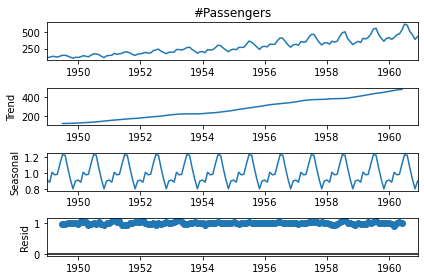

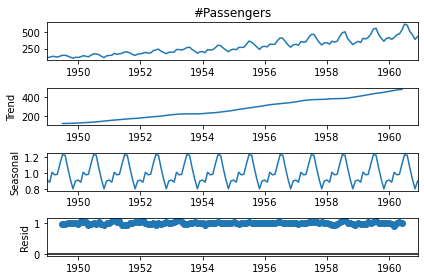

In [6]:
res.plot()

In [11]:
pip install pmdarima

Note: you may need to restart the kernel to use updated packages.


In [13]:
# To install the library


# Import the library
from pmdarima import auto_arima

# Ignore harmless warnings
import warnings
warnings.filterwarnings("ignore")

# Fit auto_arima function to AirPassengers dataset
stepwise_fit = auto_arima(airline['#Passengers'], start_p = 1, start_q = 1,
max_p = 3, max_q = 3, m = 12,
start_P = 0, seasonal = True,
d = None, D = 1, trace = True,
error_action ='ignore', # we don't want to know if an order does not work
suppress_warnings = True, # we don't want convergence warnings
stepwise = True)		 # set to stepwise

# To print the summary
stepwise_fit.summary()


Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,1,1)[12]             : AIC=1022.896, Time=1.63 sec
 ARIMA(0,1,0)(0,1,0)[12]             : AIC=1031.508, Time=0.08 sec
 ARIMA(1,1,0)(1,1,0)[12]             : AIC=1020.393, Time=0.46 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=1021.003, Time=0.67 sec
 ARIMA(1,1,0)(0,1,0)[12]             : AIC=1020.393, Time=0.13 sec
 ARIMA(1,1,0)(2,1,0)[12]             : AIC=1019.239, Time=0.75 sec
 ARIMA(1,1,0)(2,1,1)[12]             : AIC=inf, Time=6.01 sec
 ARIMA(1,1,0)(1,1,1)[12]             : AIC=1020.493, Time=1.87 sec
 ARIMA(0,1,0)(2,1,0)[12]             : AIC=1032.120, Time=1.02 sec
 ARIMA(2,1,0)(2,1,0)[12]             : AIC=1021.120, Time=1.30 sec
 ARIMA(1,1,1)(2,1,0)[12]             : AIC=1021.032, Time=1.56 sec
 ARIMA(0,1,1)(2,1,0)[12]             : AIC=1019.178, Time=0.91 sec
 ARIMA(0,1,1)(1,1,0)[12]             : AIC=1020.425, Time=0.38 sec
 ARIMA(0,1,1)(2,1,1)[12]             : AIC=inf, Time=6.98 sec
 ARIMA(0,1,1)(1,1,1)[12]     

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                      
===========================================================================================
Dep. Variable:                                   y   No. Observations:                  144
Model:             SARIMAX(0, 1, 1)x(2, 1, [], 12)   Log Likelihood                -505.589
Date:                             Wed, 12 Oct 2022   AIC                           1019.178
Time:                                     13:43:07   BIC                           1030.679
Sample:                                          0   HQIC                          1023.851
                                             - 144                                         
Covariance Type:                               opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.3634      0.074     -4.945      0.000      -0.508      -0.219
ar.S.L12      -0.1239      0.090     -1.372      0.170      -0.301       0.053
ar.S.L24       0.1911      0.107      1.783      0.075      -0.019       0.401
sigma2       130.4480     15.527      8.402      0.000     100.016     160.880
===================================================================================
Ljung-Box (L1) (Q):                   0.01   Jarque-Bera (JB):                 4.59
Prob(Q):                              0.92   Prob(JB):                         0.10
Heteroskedasticity (H):               2.70   Skew:                             0.15
Prob(H) (two-sided):                  0.00   Kurtosis:                         3.87
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [15]:
#Fit ARIMA Model to AirPassengers dataset
#split data into train and test sets
train=airline.iloc[:len(airline)-12]
test=airline.iloc[len(airline)-12:]#set one year (12 months) fc
#fit a SARIMAX(0,1,1)*(2,1,1,12) on the training set
from statsmodels.tsa.statespace.sarimax import SARIMAX
model=SARIMAX(train['#Passengers'],order=(0,1,1),seasonal_order=(2,1,1,12))
res=model.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                        #Passengers   No. Observations:                  132
Model:             SARIMAX(0, 1, 1)x(2, 1, 1, 12)   Log Likelihood                -443.011
Date:                            Wed, 12 Oct 2022   AIC                            896.022
Time:                                    13:53:40   BIC                            909.917
Sample:                                01-01-1949   HQIC                           901.664
                                     - 12-01-1959                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.2986      0.079     -3.773      0.000      -0.454      -0.144
ar.S.L12       0.7109      0.111      6.407      0.000       0.493       0.928
ar.S.L24       0.2886      0.098      2.957      0.003       0.097       0.480
ma.S.L12      -0.9853      0.824     -1.196      0.232      -2.599       0.629
sigma2        87.5266     63.161      1.386      0.166     -36.267     211.320
===================================================================================
Ljung-Box (L1) (Q):                   0.03   Jarque-Bera (JB):                 0.00
Prob(Q):                              0.86   Prob(JB):                         1.00
Heteroskedasticity (H):               1.62   Skew:                            -0.00
Prob(H) (two-sided):                  0.13   Kurtosis:                         2.99
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

<AxesSubplot:xlabel='Month'>

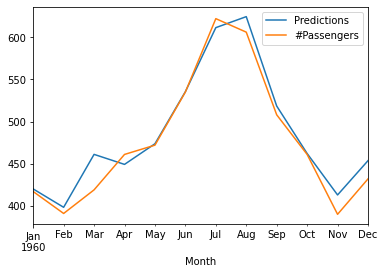

In [16]:
#Predictions of ARIMA Model against the test set
start=len(train)
end=len(train)+len(test)-1
# Predictions for one-year against the test set
predictions=res.predict(start,end,typ='levels').rename("Predictions")
#plot predicted and actual values
predictions.plot(legend=True)
test['#Passengers'].plot(legend=True)

In [17]:
#Evaluate the model using MSE and RMSE
#load specific evaluation tools
from sklearn.metrics import mean_squared_error
from statsmodels.tools.eval_measures import rmse
#calculates mean_squared error
rmse(test['#Passengers'],predictions)

17.1548383269947

<AxesSubplot:xlabel='Month'>

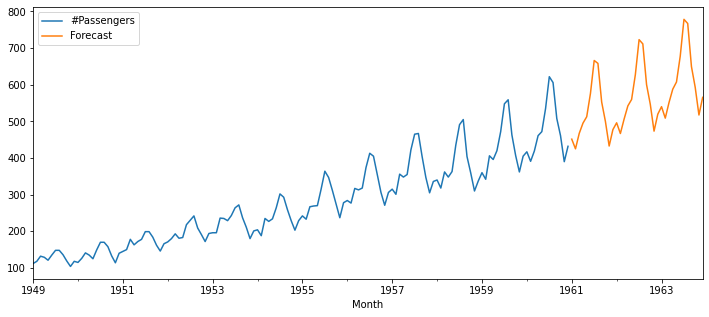

In [18]:
#Forecast using ARIMA model
#train the model on the full dataset
model=SARIMAX(airline['#Passengers'],order=(0,1,1),seasonal_order=(2,1,1,12))
res=model.fit()
#forecast for the next three years
forecast=res.predict(start=len(airline),end=(len(airline)-1)+3*12,typ='levels').rename('Forecast')
#plot the forecast values
airline['#Passengers'].plot(figsize=(12,5),legend=True)
forecast.plot(legend=True)